In [1]:
from MFEA_lib.tasks.function import Sphere, Ackley, Rosenbrock
from MFEA_lib.model.mfea import MFEA_base
from MFEA_lib.operators.CrossOver import SBX_CrossOver
from MFEA_lib.operators.Selection import ElitismSelection
from MFEA_lib.operators.Mutation import Polynomial_Mutation
from MFEA_lib.model.utils import saveModel, loadModel, compareModel
from MFEA_lib.tasks.Benchmark import CEC17_benchmark, GECCO20_benchmark_50tasks


In [2]:
tasks = [Sphere(30, bound= [-100, 100]), 
        Ackley(50, bound= [-100, 100]), 
        Rosenbrock(20, bound= [-100, 100]), 
        Rosenbrock(30, bound= [-100, 100])
]


In [3]:
model = MFEA_base()
model.compile(
    cross_over= SBX_CrossOver(nc = 15),
    mutation= Polynomial_Mutation(nm = 15),
    selection= ElitismSelection()
)
sol, his = model.fit(tasks= tasks, num_generations= 1000, num_inds_each_task= 100, rmp =0.3)


Epoch [50/1000], [=>                  ]   5% ,func_val: [3556.730879691291, 20.561966886498606, 37257720.94916244, 81318863.66450751]

Epoch [100/1000], [==>                 ]  10% ,func_val: [392.372207531228, 20.21117774143666, 442529.5638957012, 1058157.2448895401]

Epoch [150/1000], [===>                ]  15% ,func_val: [63.3040190291214, 20.086588566281563, 4983.575858110649, 39722.188623304966]

Epoch [200/1000], [====>               ]  20% ,func_val: [14.381663202404198, 20.047062917290084, 368.82680690342204, 2891.1758681365313]

Epoch [250/1000], [=====>              ]  25% ,func_val: [4.596729645631881, 20.03004187357254, 121.78271046276724, 525.1564340955526]

Epoch [300/1000], [======>             ]  30% ,func_val: [1.3558006905577822, 20.021382318121773, 79.29562739600622, 220.56830644078366]

Epoch [350/1000], [=======>            ]  35% ,func_val: [0.45785013265997004, 20.016332665319986, 46.53628950334448, 74.48190693490393]

Epoch [400/1000], [========>           ]  4

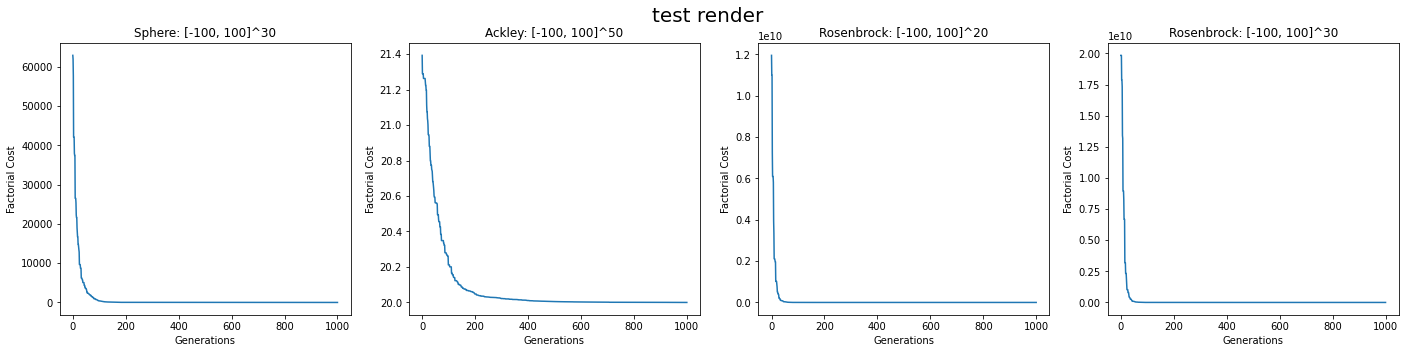

In [4]:
fig = model.render((1, 4), title= "test render")

#### Benchmark
##### CEC17


In [5]:
cec17_10tasks = CEC17_benchmark.get_10tasks_benchmark()

In [6]:
base_model = MFEA_base()
base_model.compile(
    cross_over= SBX_CrossOver(nc = 2),
    mutation= Polynomial_Mutation(nm = 5),
    selection= ElitismSelection()
)
base_sol, base_his = base_model.fit(tasks= cec17_10tasks, num_generations= 1000, num_inds_each_task= 100, rmp =0.3,
                                evaluate_initial_skillFactor= True, num_epochs_printed= 10)

saveModel(base_model, "./RESULTS/cec17_mfeabase.mso")

Epoch [100/1000], [==>                 ]  10% ,func_val: [7554.980227444271, 16060.28216027372, 13310.610114912539, 12.902644294196065, 18337849.055292174, 18.818841048171063, 40.09872265025842, 9208.086884701033, 3.6860171301015803, 4872.731833684012]

Epoch [200/1000], [====>               ]  20% ,func_val: [967.3303394753096, 2010.8774152823248, 1786.5823491982064, 9.368396752259002, 419076.0498692131, 11.465550990110504, 27.850581921843073, 6852.10551611655, 1.4468560186255588, 1164.3242687873021]

Epoch [300/1000], [======>             ]  30% ,func_val: [262.67216285317653, 311.5710751307312, 422.45249914539164, 8.387128475079315, 32410.126397499855, 6.095331036558605, 22.01798265371434, 5285.5341025934595, 1.0708767110228563, 446.62113553306693]

Epoch [400/1000], [========>           ]  40% ,func_val: [69.04529332398458, 66.91892635886873, 113.63179958615912, 7.969793418248678, 7299.285645277344, 3.5851174194169637, 10.876684205101284, 4633.310506990072, 0.8660344804502287, 244.

'Saved'

In [7]:
cec17_10tasks_fixed = CEC17_benchmark.get_10tasks_benchmark(fix= True)

In [8]:
base_model = MFEA_base()
base_model.compile(
    cross_over= SBX_CrossOver(nc = 2),
    mutation= Polynomial_Mutation(nm = 5),
    selection= ElitismSelection()
)
base_sol, base_his = base_model.fit(tasks= cec17_10tasks_fixed, num_generations= 1000, num_inds_each_task= 100, rmp =0.3,
                                evaluate_initial_skillFactor= True, num_epochs_printed= 10)

saveModel(base_model, "./RESULTS/cec17fixed_mfeabase.mso")

Epoch [100/1000], [==>                 ]  10% ,func_val: [7352.411864982494, 8944.909956065221, 16662.206160901274, 12.756935224910627, 17417293.77596973, 16.34316441090635, 36.70335834186071, 9758.259968681401, 4.175088979105952, 3854.651342859623]

Epoch [200/1000], [====>               ]  20% ,func_val: [947.1839709614105, 1441.3770275690224, 1663.7311149988395, 6.3017745306286415, 401065.13670456974, 9.735780550166105, 22.129801189795955, 7394.707432593934, 1.4145744750655052, 851.0471050974717]

Epoch [300/1000], [======>             ]  30% ,func_val: [186.4169058134774, 245.78802013719178, 276.13529254567777, 5.0941513859439524, 23143.365058621534, 5.508938967081733, 16.01472530228041, 6021.0269970067875, 1.0689257108622117, 462.2772472909275]

Epoch [400/1000], [========>           ]  40% ,func_val: [54.848215210148005, 42.707964325886316, 58.373459428529934, 4.608546557191865, 3687.336691384986, 3.174110413297079, 9.51076529290323, 5191.411043166359, 0.9397479141909603, 255.647

'Saved'